<a href="https://colab.research.google.com/github/tatsuya-takahashi/Spotify-API-Mels/blob/master/spotify_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify API Scraping

## API Scraping

### Mount & install library

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "drive/My Drive/Colab Notebooks/spotify/"

input  spotify_scraping.ipynb


In [4]:
!pip install spotipy 

  Created wheel for spotipy: filename=spotipy-2.4.4-cp36-none-any.whl size=12336 sha256=779e6697d3e44b22a33e48faf3d9c5d47f516fc8f28428e4c4bb049c5b466cd9
  Stored in directory: /root/.cache/pip/wheels/76/28/19/a86ca9bb0e32dbd4a4f580870250f5aeef852870578e0427e6
Successfully built spotipy


### Import Library

In [0]:
# libraries
import json
import pandas as pd
import spotipy
import requests
from spotipy.oauth2 import SpotifyClientCredentials
from collections import OrderedDict
from tqdm import tqdm
import plotly.express as px


# const parameter
GENRE_FILTER = ['acoustic', 'ambient', 'anime', 'edm', 'hip-hop', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'techno', 'trip-hop'] # to get genre list
SPOTIFY_CLIENT_ID = '9ad5f33b04004579b9c210132c930b4b'                                                      # spotify api client_id
SPOTIFY_CLIENT_SECRET = 'edd9f8c294f54187a4edbf6e4be63e23'                                                  # spotify api client_secret
GET_TRACK_BATCH_NUM = 50                                                                                       # number of get track info per batch
GET_TRACK_NUM_PER_GENRE = 100                                                                                 # number of total track info each genre

# parameter check
assert GET_TRACK_NUM_PER_GENRE % GET_TRACK_BATCH_NUM == 0, 'You must set GET_TRACK_NUM_PER_GENRE to number which can be devided by GET_TRACK_BATCH_NUM'

### init

In [0]:
# init
client_id = SPOTIFY_CLIENT_ID
client_secret = SPOTIFY_CLIENT_SECRET
client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

### Get genre

In [7]:
# get all genre
allGenres = spotify.recommendation_genre_seeds()['genres']
print('number of genre is : {}'.format(len(allGenres)))
print('all genres:')
print("\n".join(allGenres))

number of genre is : 126
all genres:
acoustic
afrobeat
alt-rock
alternative
ambient
anime
black-metal
bluegrass
blues
bossanova
brazil
breakbeat
british
cantopop
chicago-house
children
chill
classical
club
comedy
country
dance
dancehall
death-metal
deep-house
detroit-techno
disco
disney
drum-and-bass
dub
dubstep
edm
electro
electronic
emo
folk
forro
french
funk
garage
german
gospel
goth
grindcore
groove
grunge
guitar
happy
hard-rock
hardcore
hardstyle
heavy-metal
hip-hop
holidays
honky-tonk
house
idm
indian
indie
indie-pop
industrial
iranian
j-dance
j-idol
j-pop
j-rock
jazz
k-pop
kids
latin
latino
malay
mandopop
metal
metal-misc
metalcore
minimal-techno
movies
mpb
new-age
new-release
opera
pagode
party
philippines-opm
piano
pop
pop-film
post-dubstep
power-pop
progressive-house
psych-rock
punk
punk-rock
r-n-b
rainy-day
reggae
reggaeton
road-trip
rock
rock-n-roll
rockabilly
romance
sad
salsa
samba
sertanejo
show-tunes
singer-songwriter
ska
sleep
songwriter
soul
soundtracks
spanish
study


In [8]:
# genres filter
target_genres = []
for genre in allGenres:
  if genre in GENRE_FILTER:
    target_genres.append(genre)
print(target_genres)

['acoustic', 'ambient', 'anime', 'edm', 'hip-hop', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'techno', 'trip-hop']


### Get Track Data

#### get tracks from target genre.

In [0]:
all_tracks = []
itter = int(GET_TRACK_NUM_PER_GENRE / GET_TRACK_BATCH_NUM)

def getTrackData(trackId, track, track_features):
      trackData = OrderedDict([
          ("track_id", trackId),
          ("track_name", track["name"]),
          ("track_url", track["external_urls"]["spotify"]),
          ("available_markets", ",".join(track["available_markets"])),
          ("disc_number", track["disc_number"]),
          ("duration_ms", track["duration_ms"]),
          ("popularity", track["popularity"]),
          ("preview_url", track["preview_url"]),
          ("track_number", track["track_number"]),
          ("acousticness", track_features["acousticness"]),
          ("danceability", track_features["danceability"]),
          ("energy", track_features["energy"]),
          ("instrumentalness", track_features["instrumentalness"]),
          ("liveness", track_features["liveness"]),
          ("loudness", track_features["loudness"]),
          ("valence", track_features["valence"]),
          ("speechiness", track_features["speechiness"]),
          ("key", track_features["key"]),
          ("mode", track_features["mode"]),
          ("tempo", track_features["tempo"]),
          ("time_signature", track_features["time_signature"]),
          ("artist_id", track["artists"][0]['id']),
          ("artist_name", track["artists"][0]['name']),
          ("artist_url", track["artists"][0]['external_urls']['spotify']),
          ("artist_type", track["artists"][0]['type']),
          ("album_url", track["album"]["external_urls"]["spotify"]),
          ("album_id", track["album"]["id"]),
          ("album_name", track["album"]["name"]),
          ("album_image_url", track["album"]["images"][0]["url"]),
          ("release_date", track["album"]["release_date"]),
          ("total_tracks", track["album"]["total_tracks"]),
          ("genre", genre),
      ])
      return trackData

def saveTrackData(trackId, trackData):
  # save track data
  response = requests.get(trackData['preview_url'])
  with open("drive/My Drive/Colab Notebooks/spotify/input/tracks/{}.mp3".format(trackId), 'wb') as saveFile:
      saveFile.write(response.content)

def getTrackDataRecursive(genre, offset):
  item = spotify.search(q="genre:{}".format(genre) ,limit=1, offset=offset, market='JP')['tracks']['items'][0]
  trackId = item['id']
  track = spotify.track(trackId)
  track_features = spotify.audio_features(trackId)[0]
  if track["preview_url"] == None:
    print("\n{} - {}'s preview mp3 file dosen't exist.".format(track["artists"][0]['name'], track["name"]))
    offset += 1
    offset = getTrackDataRecursive(genre, offset)
  else:
    # save track data
    trackData = getTrackData(trackId, track, track_features)
    all_tracks.append(trackData)
    saveTrackData(trackId, trackData)
  return offset

# get all target genre's track
for genre in tqdm(target_genres):

  maxoffset = GET_TRACK_NUM_PER_GENRE

  for i in range(itter):
    tracks = spotify.search(q="genre:{}".format(genre) ,limit=GET_TRACK_BATCH_NUM, offset=i * GET_TRACK_BATCH_NUM, market='JP')['tracks']

    for item in tracks['items']:
      trackId = item['id']
      track = spotify.track(trackId)
      track_features = spotify.audio_features(trackId)[0]

      if track["preview_url"] == None:
        print("\n{} - {}'s preview mp3 file dosen't exist.".format(track["artists"][0]['name'], track["name"]))
        maxoffset += 1
        maxoffset = getTrackDataRecursive(genre, maxoffset)
      else:
        # save track data
        trackData = getTrackData(trackId, track, track_features)
        all_tracks.append(trackData)
        saveTrackData(trackId, trackData)

print('\nget {} tracks'.format(len(all_tracks)))

  0%|          | 0/11 [00:00<?, ?it/s]


Motohiro Hata - 鱗(うろこ)'s preview mp3 file dosen't exist.

Motohiro Hata - ひまわりの約束's preview mp3 file dosen't exist.

Naotaro Moriyama - さくら - 独唱's preview mp3 file dosen't exist.

Masaharu Fukuyama - 家族になろうよ's preview mp3 file dosen't exist.

Masayoshi Yamazaki - One more time, One more chance's preview mp3 file dosen't exist.

Motohiro Hata - ひまわりの約束's preview mp3 file dosen't exist.

Mone Kamishiraishi - 一縷's preview mp3 file dosen't exist.

Masaharu Fukuyama - 虹's preview mp3 file dosen't exist.

Masaharu Fukuyama - 桜坂's preview mp3 file dosen't exist.

Naotaro Moriyama - さくら - 二〇一九's preview mp3 file dosen't exist.

Mone Kamishiraishi - ハッピーエンド's preview mp3 file dosen't exist.

Motohiro Hata - ひまわりの約束's preview mp3 file dosen't exist.

Motohiro Hata - Rain's preview mp3 file dosen't exist.

Masaharu Fukuyama - 桜坂's preview mp3 file dosen't exist.

Motohiro Hata - 仰げば青空's preview mp3 file dosen't exist.

Motohiro Hata - Raspberry Lover's preview mp3 file dosen't exist.

Yosui Inou

  9%|▉         | 1/11 [00:34<05:43, 34.34s/it]


Max Richter - Dream 1 (before the wind blows it all away) - Pt. 1's preview mp3 file dosen't exist.

Akira Kosemura - Inside River, Pt. 2's preview mp3 file dosen't exist.

Lambert - Otis's preview mp3 file dosen't exist.

Ólafur Arnalds - Doria - Island Songs VII's preview mp3 file dosen't exist.

Max Richter - Dream 11 (whisper music) - Pt. 1's preview mp3 file dosen't exist.

Ólafur Arnalds - Words Of Amber's preview mp3 file dosen't exist.

Matt Stewart-Evans - Becalm's preview mp3 file dosen't exist.

Lambert - Awake's preview mp3 file dosen't exist.

Akira Kosemura - DNA's preview mp3 file dosen't exist.

Max Richter - A Catalogue Of Afternoons's preview mp3 file dosen't exist.

Luke Howard - In Metaphor, Solace's preview mp3 file dosen't exist.

Joep Beving - Aika - From "The Promised Land" Soundtrack's preview mp3 file dosen't exist.

Max Richter - Written On The Sky's preview mp3 file dosen't exist.


 18%|█▊        | 2/11 [01:06<05:04, 33.79s/it]


[ALEXANDROS] - ワタリドリ's preview mp3 file dosen't exist.

Hikaru Utada - 花束を君に's preview mp3 file dosen't exist.

Sukima Switch - 奏(かなで)'s preview mp3 file dosen't exist.

Mrs. GREEN APPLE - 点描の唄's preview mp3 file dosen't exist.

GReeeeN - 愛唄's preview mp3 file dosen't exist.

Sheena Ringo - 丸ノ内サディスティック's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - 青と夏's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - WanteD! WanteD!'s preview mp3 file dosen't exist.

Mrs. GREEN APPLE - 青と夏's preview mp3 file dosen't exist.

Motohiro Hata - 鱗(うろこ)'s preview mp3 file dosen't exist.

Motohiro Hata - ひまわりの約束's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - 春愁's preview mp3 file dosen't exist.

GReeeeN - キセキ's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - ロマンチシズム's preview mp3 file dosen't exist.

Sheena Ringo - 公然の秘密's preview mp3 file dosen't exist.

AI - Story's preview mp3 file dosen't exist.

DREAMS COME TRUE - 何度でも's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - インフェルノ's 

 27%|██▋       | 3/11 [01:43<04:37, 34.67s/it]


Avicii - Wake Me Up's preview mp3 file dosen't exist.

Avicii - The Nights's preview mp3 file dosen't exist.

Avicii - SOS (feat. Aloe Blacc)'s preview mp3 file dosen't exist.

Avicii - Waiting For Love's preview mp3 file dosen't exist.

Zedd - Good Thing (with Kehlani)'s preview mp3 file dosen't exist.

Avicii - Without You (feat. Sandro Cavazza)'s preview mp3 file dosen't exist.

Zedd - The Middle's preview mp3 file dosen't exist.

Avicii - Heaven's preview mp3 file dosen't exist.

Tiësto - God Is A Dancer (with Mabel)'s preview mp3 file dosen't exist.

Zedd - Stay's preview mp3 file dosen't exist.

Jonas Blue - Rise's preview mp3 file dosen't exist.

NOTD - I Miss Myself (with HRVY)'s preview mp3 file dosen't exist.

Avicii - Lonely Together (feat. Rita Ora)'s preview mp3 file dosen't exist.

Jonas Blue - Mama's preview mp3 file dosen't exist.

NOTD - So Close's preview mp3 file dosen't exist.

Jonas Blue - Younger's preview mp3 file dosen't exist.

Gryffin - OMG (with Carly Rae Je

 36%|███▋      | 4/11 [02:30<04:28, 38.35s/it]


Lil Baby - Catch The Sun - From "Queen & Slim: The Soundtrack"'s preview mp3 file dosen't exist.

Will Smith - Friend Like Me's preview mp3 file dosen't exist.

Daddy Yankee - Que Tire Pa Lante's preview mp3 file dosen't exist.

NF - Let You Down's preview mp3 file dosen't exist.

Daddy Yankee - Dura's preview mp3 file dosen't exist.

Drake - In My Feelings's preview mp3 file dosen't exist.

Drake - Money In The Grave (Drake ft. Rick Ross)'s preview mp3 file dosen't exist.

Kendrick Lamar - DNA.'s preview mp3 file dosen't exist.

Will Smith - Prince Ali's preview mp3 file dosen't exist.

Eminem - Venom - Music From The Motion Picture's preview mp3 file dosen't exist.

DaBaby - BOP's preview mp3 file dosen't exist.

Will Smith - Arabian Nights (2019)'s preview mp3 file dosen't exist.

Eminem - Without Me's preview mp3 file dosen't exist.

Eminem - Lose Yourself - From "8 Mile" Soundtrack's preview mp3 file dosen't exist.

Eminem - Love The Way You Lie's preview mp3 file dosen't exist.


 45%|████▌     | 5/11 [03:19<04:09, 41.59s/it]


Thelma Aoyama - そばにいるね's preview mp3 file dosen't exist.

Thelma Aoyama - 何度も's preview mp3 file dosen't exist.

EMMA WAHLIN - Technicolor's preview mp3 file dosen't exist.

Thelma Aoyama - 一生仲間's preview mp3 file dosen't exist.

EMMA WAHLIN - Make A Move's preview mp3 file dosen't exist.

SWAY - ON FIRE's preview mp3 file dosen't exist.


 55%|█████▍    | 6/11 [03:48<03:09, 37.82s/it]


Ko Shibasaki - かたちあるもの's preview mp3 file dosen't exist.

Perfume - ナナナナナイロ's preview mp3 file dosen't exist.

Mihimaru GT - 気分上々↑↑'s preview mp3 file dosen't exist.

Perfume - TOKYO GIRL - Remastered's preview mp3 file dosen't exist.

POLKADOT STINGRAY - バケノカワ's preview mp3 file dosen't exist.

Perfume - FLASH's preview mp3 file dosen't exist.

POLKADOT STINGRAY - ヒミツ's preview mp3 file dosen't exist.

POLKADOT STINGRAY - 女神's preview mp3 file dosen't exist.


 64%|██████▎   | 7/11 [04:21<02:24, 36.18s/it]


back number - 高嶺の花子さん's preview mp3 file dosen't exist.

SPITZ - ロビンソン's preview mp3 file dosen't exist.

[ALEXANDROS] - あまりにも素敵な夜だから's preview mp3 file dosen't exist.

back number - クリスマスソング's preview mp3 file dosen't exist.

back number - ハッピーエンド's preview mp3 file dosen't exist.

[ALEXANDROS] - ワタリドリ's preview mp3 file dosen't exist.

DREAMS COME TRUE - 何度でも's preview mp3 file dosen't exist.

Sukima Switch - 奏(かなで)'s preview mp3 file dosen't exist.

GReeeeN - 愛唄's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - 点描の唄's preview mp3 file dosen't exist.

Sheena Ringo - 丸ノ内サディスティック's preview mp3 file dosen't exist.

back number - ヒロイン's preview mp3 file dosen't exist.

Motohiro Hata - 鱗(うろこ)'s preview mp3 file dosen't exist.

Motohiro Hata - ひまわりの約束's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - 青と夏's preview mp3 file dosen't exist.

SHISHAMO - 明日も's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - WanteD! WanteD!'s preview mp3 file dosen't exist.

back number - 花束's previ

 73%|███████▎  | 8/11 [04:59<01:50, 36.74s/it]


back number - 高嶺の花子さん's preview mp3 file dosen't exist.

SPITZ - チェリー's preview mp3 file dosen't exist.

RADWIMPS - セプテンバーさん's preview mp3 file dosen't exist.

back number - 僕は君の事が好きだけど君は僕を別に好きじゃないみたい's preview mp3 file dosen't exist.

back number - クリスマスソング's preview mp3 file dosen't exist.

back number - ハッピーエンド's preview mp3 file dosen't exist.

[ALEXANDROS] - ワタリドリ's preview mp3 file dosen't exist.

SPITZ - 優しいあの子's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - 点描の唄's preview mp3 file dosen't exist.

Sukima Switch - 奏(かなで)'s preview mp3 file dosen't exist.

Sheena Ringo - 丸ノ内サディスティック's preview mp3 file dosen't exist.

back number - ヒロイン's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - 青と夏's preview mp3 file dosen't exist.

Motohiro Hata - 鱗(うろこ)'s preview mp3 file dosen't exist.

Motohiro Hata - ひまわりの約束's preview mp3 file dosen't exist.

Mrs. GREEN APPLE - WanteD! WanteD!'s preview mp3 file dosen't exist.

Mrs. GREEN APPLE - 青と夏's preview mp3 file dosen't exist.

SHISHA

 82%|████████▏ | 9/11 [05:41<01:16, 38.30s/it]


Zedd - Good Thing (with Kehlani)'s preview mp3 file dosen't exist.

Zedd - The Middle's preview mp3 file dosen't exist.

Zedd - Stay's preview mp3 file dosen't exist.

Zedd - Beautiful Now's preview mp3 file dosen't exist.

Zedd - 365's preview mp3 file dosen't exist.

Zedd - Stay's preview mp3 file dosen't exist.

Zedd - I Want You To Know's preview mp3 file dosen't exist.

Zedd - Clarity's preview mp3 file dosen't exist.

Zedd - Get Low's preview mp3 file dosen't exist.

Zedd - Human's preview mp3 file dosen't exist.

Zedd - Stay The Night - Featuring Hayley Williams Of Paramore's preview mp3 file dosen't exist.

Duke Dumont - Ocean Drive's preview mp3 file dosen't exist.

Duke Dumont - I Got U's preview mp3 file dosen't exist.

Zedd - Spectrum - Radio Mix's preview mp3 file dosen't exist.

Zedd - Find You's preview mp3 file dosen't exist.

Zedd - Daisy's preview mp3 file dosen't exist.

Zedd - Addicted To A Memory's preview mp3 file dosen't exist.

Zedd - Done With Love's preview m

 91%|█████████ | 10/11 [06:22<00:39, 39.16s/it]


Massive Attack - Teardrop's preview mp3 file dosen't exist.

DJ Shadow - Blood On The Motorway's preview mp3 file dosen't exist.

Björk - Big Time Sensuality's preview mp3 file dosen't exist.

DJ Shadow - Six Days - Remix's preview mp3 file dosen't exist.

Massive Attack - Unfinished Sympathy - 2012 Mix/Master's preview mp3 file dosen't exist.

Portishead - Glory Box's preview mp3 file dosen't exist.

The Orb - Little Fluffy Clouds's preview mp3 file dosen't exist.

Björk - Hyper-ballad's preview mp3 file dosen't exist.

Portishead - Wandering Star's preview mp3 file dosen't exist.

Massive Attack - Dissolved Girl's preview mp3 file dosen't exist.

Massive Attack - Protection's preview mp3 file dosen't exist.

DJ Shadow - Rocket Fuel (feat. De La Soul)'s preview mp3 file dosen't exist.

Massive Attack - Paradise Circus's preview mp3 file dosen't exist.

Everything But The Girl - Wrong's preview mp3 file dosen't exist.

Björk - All Is Full Of Love's preview mp3 file dosen't exist.

Mas

100%|██████████| 11/11 [07:03<00:00, 39.76s/it]


get 1100 tracks


In [0]:
df = pd.DataFrame(all_tracks)
df.to_csv("drive/My Drive/Colab Notebooks/spotify/input/all_tracks.csv")

## Simple EDA

In [9]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/spotify/input/all_tracks.csv", index_col=0)
df.head()

,track_id,track_name,track_url,available_markets,disc_number,duration_ms,popularity,preview_url,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,valence,speechiness,key,mode,tempo,time_signature,artist_id,artist_name,artist_url,artist_type,album_url,album_id,album_name,album_image_url,release_date,total_tracks,genre
0,2cKiHG16JBiqHdi7Llq0r7,マリーゴールド,https://open.spotify.com/track/2cKiHG16JBiqHdi...,JP,1,306626,70,https://p.scdn.co/mp3-preview/3e7e7b371ffc326a...,2,0.04520,0.545,0.745,0.0,0.0907,-3.098,0.413,0.0286,2,1,106.094,4,5kVZa4lFUmAQlBogl1fkd6,Aimyon,https://open.spotify.com/artist/5kVZa4lFUmAQlB...,artist,https://open.spotify.com/album/7fIqmc4GIaueaiA...,7fIqmc4GIaueaiAoDifAaA,瞬間的シックスセンス,https://i.scdn.co/image/ab67616d0000b273c12d78...,2019-02-13,12,acoustic
1,59eluCMn0XbOWqeWQ91FTM,君はロックを聴かない,https://open.spotify.com/track/59eluCMn0XbOWqe...,"AD,AE,AR,AT,AU,BE,BG,BH,BO,BR,CA,CH,CL,CO,CR,C...",1,246306,69,https://p.scdn.co/mp3-preview/30ec3bcd6e2a7b8e...,3,0.00135,0.524,0.687,0.0,0.1690,-4.039,0.619,0.0267,7,1,99.919,4,5kVZa4lFUmAQlBogl1fkd6,Aimyon,https://open.spotify.com/artist/5kVZa4lFUmAQlB...,artist,https://open.spotify.com/album/0ct8ESCAYEpDGYJ...,0ct8ESCAYEpDGYJOndCfft,青春のエキサイトメント,https://i.scdn.co/image/ab67616d0000b27333c05e...,2017-09-12,11,acoustic
2,7GYGVDPbi0zQUBIkuOPAY0,ハルノヒ,https://open.spotify.com/track/7GYGVDPbi0zQUBI...,JP,1,326866,67,https://p.scdn.co/mp3-preview/ee0dafec3a6be79d...,1,0.26300,0.591,0.673,0.0,0.1090,-2.445,0.525,0.0294,9,1,106.956,4,5kVZa4lFUmAQlBogl1fkd6,Aimyon,https://open.spotify.com/artist/5kVZa4lFUmAQlB...,artist,https://open.spotify.com/album/5tyY60vM88GlZb3...,5tyY60vM88GlZb3uyQDie7,ハルノヒ,https://i.scdn.co/image/ab67616d0000b27360a127...,2019-04-03,1,acoustic
3,3u0e8pyoVc7l2u3T5thohY,空の青さを知る人よ,https://open.spotify.com/track/3u0e8pyoVc7l2u3...,JP,1,304933,66,https://p.scdn.co/mp3-preview/72e993c0c2e489de...,1,0.18000,0.574,0.714,0.0,0.3100,-1.969,0.633,0.0329,7,1,107.985,4,5kVZa4lFUmAQlBogl1fkd6,Aimyon,https://open.spotify.com/artist/5kVZa4lFUmAQlB...,artist,https://open.spotify.com/album/5AUnS2CxEylHubj...,5AUnS2CxEylHubj6Ro9uDC,空の青さを知る人よ,https://i.scdn.co/image/0487c45d7c81f54e3ec128...,2019-09-13,1,acoustic
4,6kKvmT4i0Dercz6f3kftg3,今夜このまま,https://open.spotify.com/track/6kKvmT4i0Dercz6...,JP,1,238093,65,https://p.scdn.co/mp3-preview/5047b50dec0760f5...,9,0.02540,0.441,0.852,0.0,0.0862,-3.595,0.640,0.0383,1,1,104.855,4,5kVZa4lFUmAQlBogl1fkd6,Aimyon,https://open.spotify.com/artist/5kVZa4lFUmAQlB...,artist,https://open.spotify.com/album/7fIqmc4GIaueaiA...,7fIqmc4GIaueaiAoDifAaA,瞬間的シックスセンス,https://i.scdn.co/image/ab67616d0000b273c12d78...,2019-02-13,12,acoustic


### track count per genre

In [10]:
fig = px.bar(
    df.groupby("genre", as_index=False).count()[["genre", "track_id"]].rename(columns={"track_id": "cnt"}), 
    x='genre', 
    y='cnt',
    color='genre',
    title='track count per genre'
)
fig.show()

### unique artist per genre

In [11]:
df.groupby(["genre", "artist_id"], as_index=False).count()[["genre", "artist_name"]].groupby("genre", as_index=False).count()

,genre,artist_name
0,acoustic,14
1,ambient,36
2,anime,30
3,edm,31
4,hip-hop,48
5,j-dance,19
6,j-idol,23
7,j-pop,35
8,j-rock,29
9,techno,26


### unique album per genre

In [12]:
df.groupby(["genre", "album_id"], as_index=False).count()[["genre", "album_id"]].groupby("genre", as_index=False).count()

,genre,album_id
0,acoustic,42
1,ambient,61
2,anime,59
3,edm,91
4,hip-hop,79
5,j-dance,60
6,j-idol,79
7,j-pop,70
8,j-rock,60
9,techno,58


### distribution of track features

In [13]:
# target track feature
TRACK_FEATURES = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]

for genre in target_genres:

  # genre filter
  df_filtered = df[df["genre"] == genre]

  # dataframe array
  df_features = []
  df_concat = pd.DataFrame()

  # vertical stack
  for trackFeature in TRACK_FEATURES:
    df_feature = df_filtered[trackFeature].reset_index().rename(columns={trackFeature: "trackFeatureValue"})
    df_feature["index"] = [trackFeature for i in range(len(df_feature))]
    df_concat = pd.concat([df_concat, df_feature])

  fig = px.box(df_concat, y="trackFeatureValue", color="index", title="{}'s track feature distribution".format(genre), height=400)
  fig.show()

## Melspectrogram
- refer to: https://www.kaggle.com/daisukelab/cnn-2d-basic-solution-powered-by-fast-ai

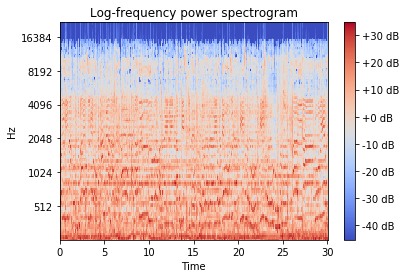

In [14]:
import librosa
import librosa.display
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import matplotlib.pyplot as plt
import IPython
import IPython.display
import PIL
import os
import pickle
import random


def read_audio(conf, pathname, trim_long_data):
    y, sr = librosa.load(pathname, sr=conf.sampling_rate)
    # trim silence
    if 0 < len(y): # workaround: 0 length causes error
        y, _ = librosa.effects.trim(y) # trim, top_db=default(60)
    # make it unified length to conf.samples
    if len(y) > conf.samples: # long enough
        if trim_long_data:
            y = y[0:0+conf.samples]
    else: # pad blank
        padding = conf.samples - len(y)    # add padding at both ends
        offset = padding // 2
        y = np.pad(y, (offset, conf.samples - len(y) - offset), 'constant')
    return y

def audio_to_melspectrogram(conf, audio):
    spectrogram = librosa.feature.melspectrogram(audio, 
                                                 sr=conf.sampling_rate,
                                                 n_mels=conf.n_mels,
                                                 hop_length=conf.hop_length,
                                                 n_fft=conf.n_fft,
                                                 fmin=conf.fmin,
                                                 fmax=conf.fmax)
    spectrogram = librosa.power_to_db(spectrogram)
    spectrogram = spectrogram.astype(np.float32)
    return spectrogram

def show_melspectrogram(conf, mels, title='Log-frequency power spectrogram'):
    librosa.display.specshow(mels, x_axis='time', y_axis='mel', 
                             sr=conf.sampling_rate, hop_length=conf.hop_length,
                            fmin=conf.fmin, fmax=conf.fmax)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

def read_as_melspectrogram(conf, pathname, trim_long_data, debug_display=False):
    x = read_audio(conf, pathname, trim_long_data)
    mels = audio_to_melspectrogram(conf, x)
    if debug_display:
        IPython.display.display(IPython.display.Audio(x, rate=conf.sampling_rate))
        show_melspectrogram(conf, mels)
    return mels


class conf:
    # Preprocessing settings
    sampling_rate = 44100
    duration = 2
    hop_length = 347*duration # to make time steps 128
    fmin = 20
    fmax = sampling_rate // 2
    n_mels = 128
    n_fft = n_mels * 20
    samples = sampling_rate * duration

# example(マリーゴールド)
x = read_as_melspectrogram(conf, "drive/My Drive/Colab Notebooks/spotify/input/tracks/2cKiHG16JBiqHdi7Llq0r7.mp3", trim_long_data=False, debug_display=True)

In [0]:
def mono_to_color(X, mean=None, std=None, norm_max=None, norm_min=None, eps=1e-6):
    # Stack X as [X,X,X]
    X = np.stack([X, X, X], axis=-1)

    # Standardize
    mean = mean or X.mean()
    std = std or X.std()
    Xstd = (X - mean) / (std + eps)
    _min, _max = Xstd.min(), Xstd.max()
    norm_max = norm_max or _max
    norm_min = norm_min or _min
    if (_max - _min) > eps:
        # Scale to [0, 255]
        V = Xstd
        V[V < norm_min] = norm_min
        V[V > norm_max] = norm_max
        V = 255 * (V - norm_min) / (norm_max - norm_min)
        V = V.astype(np.uint8)
    else:
        # Just zero
        V = np.zeros_like(Xstd, dtype=np.uint8)
    return V

def convert_wav_to_image(df, source, img_dest):
    X = []
    for i, row in tqdm(df.iterrows()):
        x = read_as_melspectrogram(conf, source/str(row.track_id + ".mp3"), trim_long_data=False)
        x_color = mono_to_color(x)
        X.append(x_color)
    return X

X_train = convert_wav_to_image(df, source=Path('drive/My Drive/Colab Notebooks/spotify/input/tracks/'), img_dest=Path('drive/My Drive/Colab Notebooks/spotify/input/track_mels/'))

1100it [18:12,  1.11s/it]


In [0]:
# save pickle
with open('drive/My Drive/Colab Notebooks/spotify/input/track_mels/track_mels.pickle', mode='wb') as f:
  pickle.dump(X_train, f)

### train
- refert to: https://www.kaggle.com/mhiro2/simple-2d-cnn-classifier-with-pytorch

In [0]:
# load pickle
with open('drive/My Drive/Colab Notebooks/spotify/input/track_mels/track_mels.pickle', mode='rb') as f:
  train_X = pickle.load(f)

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from fastprogress import master_bar, progress_bar
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
from psutil import cpu_count
from sklearn.model_selection import train_test_split
import time
from collections import Counter, defaultdict
from functools import partial
from PIL import Image

In [17]:
torch.cuda.is_available()

True

In [0]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

SEED = 2019
seed_everything(SEED)

In [0]:
N_JOBS = cpu_count()
os.environ['MKL_NUM_THREADS'] = str(N_JOBS)
os.environ['OMP_NUM_THREADS'] = str(N_JOBS)
DataLoader = partial(DataLoader, num_workers=N_JOBS)

In [0]:
# from official code https://colab.research.google.com/drive/1AgPdhSp7ttY18O3fEoHOQKlt_3HJDLi8#scrollTo=cRCaCIb9oguU
def _one_sample_positive_class_precisions(scores, truth):
    """Calculate precisions for each true class for a single sample.

    Args:
      scores: np.array of (num_classes,) giving the individual classifier scores.
      truth: np.array of (num_classes,) bools indicating which classes are true.

    Returns:
      pos_class_indices: np.array of indices of the true classes for this sample.
      pos_class_precisions: np.array of precisions corresponding to each of those
        classes.
    """
    num_classes = scores.shape[0]
    pos_class_indices = np.flatnonzero(truth > 0)
    # Only calculate precisions if there are some true classes.
    if not len(pos_class_indices):
        return pos_class_indices, np.zeros(0)
    # Retrieval list of classes for this sample.
    retrieved_classes = np.argsort(scores)[::-1]
    # class_rankings[top_scoring_class_index] == 0 etc.
    class_rankings = np.zeros(num_classes, dtype=np.int)
    class_rankings[retrieved_classes] = range(num_classes)
    # Which of these is a true label?
    retrieved_class_true = np.zeros(num_classes, dtype=np.bool)
    retrieved_class_true[class_rankings[pos_class_indices]] = True
    # Num hits for every truncated retrieval list.
    retrieved_cumulative_hits = np.cumsum(retrieved_class_true)
    # Precision of retrieval list truncated at each hit, in order of pos_labels.
    precision_at_hits = (
            retrieved_cumulative_hits[class_rankings[pos_class_indices]] /
            (1 + class_rankings[pos_class_indices].astype(np.float)))
    return pos_class_indices, precision_at_hits


def calculate_per_class_lwlrap(truth, scores):
    """Calculate label-weighted label-ranking average precision.

    Arguments:
      truth: np.array of (num_samples, num_classes) giving boolean ground-truth
        of presence of that class in that sample.
      scores: np.array of (num_samples, num_classes) giving the classifier-under-
        test's real-valued score for each class for each sample.

    Returns:
      per_class_lwlrap: np.array of (num_classes,) giving the lwlrap for each
        class.
      weight_per_class: np.array of (num_classes,) giving the prior of each
        class within the truth labels.  Then the overall unbalanced lwlrap is
        simply np.sum(per_class_lwlrap * weight_per_class)
    """
    assert truth.shape == scores.shape
    num_samples, num_classes = scores.shape
    # Space to store a distinct precision value for each class on each sample.
    # Only the classes that are true for each sample will be filled in.
    precisions_for_samples_by_classes = np.zeros((num_samples, num_classes))
    for sample_num in range(num_samples):
        pos_class_indices, precision_at_hits = (
            _one_sample_positive_class_precisions(scores[sample_num, :],
                                                  truth[sample_num, :]))
        precisions_for_samples_by_classes[sample_num, pos_class_indices] = (
            precision_at_hits)
    labels_per_class = np.sum(truth > 0, axis=0)
    weight_per_class = labels_per_class / float(np.sum(labels_per_class))
    # Form average of each column, i.e. all the precisions assigned to labels in
    # a particular class.
    per_class_lwlrap = (np.sum(precisions_for_samples_by_classes, axis=0) /
                        np.maximum(1, labels_per_class))
    # overall_lwlrap = simple average of all the actual per-class, per-sample precisions
    #                = np.sum(precisions_for_samples_by_classes) / np.sum(precisions_for_samples_by_classes > 0)
    #           also = weighted mean of per-class lwlraps, weighted by class label prior across samples
    #                = np.sum(per_class_lwlrap * weight_per_class)
    return per_class_lwlrap, weight_per_class

In [21]:
# get lables
labels = list(df.groupby("genre").count().index)
num_classes = len(labels)

# one-hot encoding
train_x = df[["track_id", "track_name", "genre"]]
train_y = pd.get_dummies(train_x, columns=["genre"]).drop(["track_id", "track_name"], axis=1)
display(train_y.head())

,genre_acoustic,genre_ambient,genre_anime,genre_edm,genre_hip-hop,genre_j-dance,genre_j-idol,genre_j-pop,genre_j-rock,genre_techno,genre_trip-hop
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [0]:
class FATTrainDataset(Dataset):
    def __init__(self, mels, labels, transforms):
        super().__init__()
        self.mels = mels
        self.labels = labels
        self.transforms = transforms
        
    def __len__(self):
        return len(self.mels)
    
    def __getitem__(self, idx):
        # crop 1sec
        image = Image.fromarray(self.mels[idx], mode='RGB')        
        time_dim, base_dim = image.size
        crop = random.randint(0, time_dim - base_dim)
        image = image.crop([crop, 0, crop + base_dim, base_dim])
        image = self.transforms(image).div_(255)

        label = self.labels[idx]
        label = torch.from_numpy(label).float()
        
        return image, label

In [0]:
class FATTestDataset(Dataset):
    def __init__(self, fnames, mels, transforms, tta=5):
        super().__init__()
        self.fnames = fnames
        self.mels = mels
        self.transforms = transforms
        self.tta = tta
        
    def __len__(self):
        return len(self.fnames) * self.tta
    
    def __getitem__(self, idx):
        new_idx = idx % len(self.fnames)
        
        image = Image.fromarray(self.mels[new_idx], mode='RGB')
        time_dim, base_dim = image.size
        crop = random.randint(0, time_dim - base_dim)
        image = image.crop([crop, 0, crop + base_dim, base_dim])
        image = self.transforms(image).div_(255)

        fname = self.fnames[new_idx]
        
        return image, fname

In [0]:
transforms_dict = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
    ])
}

In [0]:
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(out_channels, out_channels, 3, 1, 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

        self._init_weights()
        
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.zeros_(m.bias)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = F.avg_pool2d(x, 2)
        return x

In [0]:
class Classifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        
        self.conv = nn.Sequential(
            ConvBlock(in_channels=3, out_channels=64),
            ConvBlock(in_channels=64, out_channels=128),
            ConvBlock(in_channels=128, out_channels=256),
            ConvBlock(in_channels=256, out_channels=512),
        )
        
        self.fc = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(512, 128),
            nn.PReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.1),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.conv(x)
        x = torch.mean(x, dim=3)
        x, _ = torch.max(x, dim=2)
        x = self.fc(x)
        return x

In [27]:
Classifier(num_classes=num_classes)

Classifier(
  (conv): Sequential(
    (0): ConvBlock(
      (conv1): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (conv2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (1): ConvBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (conv2): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
  

In [0]:
def train_model(x_train, y_train, train_transforms):
    num_epochs = 80
    batch_size = 80
    test_batch_size = 20
    lr = 3e-3
    eta_min = 1e-5
    t_max = 10
    
    num_classes = y_train.shape[1]

    x_trn, x_val, y_trn, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=SEED)
    
    train_dataset = FATTrainDataset(x_trn, y_trn, train_transforms)
    valid_dataset = FATTrainDataset(x_val, y_val, train_transforms)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=test_batch_size, shuffle=False)

    model = Classifier(num_classes=num_classes).cuda()
    criterion = nn.BCEWithLogitsLoss().cuda()
    optimizer = Adam(params=model.parameters(), lr=lr, amsgrad=False)
    scheduler = CosineAnnealingLR(optimizer, T_max=t_max, eta_min=eta_min)

    best_epoch = -1
    best_lwlrap = 0.
    mb = master_bar(range(num_epochs))
    for epoch in mb:
        start_time = time.time()
        model.train()
        avg_loss = 0.

        for x_batch, y_batch in progress_bar(train_loader, parent=mb):
            
            preds = model(x_batch.cuda())
            loss = criterion(preds, y_batch.cuda())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            avg_loss += loss.item() / len(train_loader)

        model.eval()
        valid_preds = np.zeros((len(x_val), num_classes))
        avg_val_loss = 0.

        for i, (x_batch, y_batch) in enumerate(valid_loader):
            preds = model(x_batch.cuda()).detach()
            loss = criterion(preds, y_batch.cuda())

            preds = torch.sigmoid(preds)
            valid_preds[i * test_batch_size: (i+1) * test_batch_size] = preds.cpu().numpy()

            avg_val_loss += loss.item() / len(valid_loader)
            
        score, weight = calculate_per_class_lwlrap(y_val, valid_preds)
        lwlrap = (score * weight).sum()
        
        scheduler.step()

        if (epoch + 1) % 5 == 0:
            elapsed = time.time() - start_time
            mb.write(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  val_lwlrap: {lwlrap:.6f}  time: {elapsed:.0f}s')
    
        if lwlrap > best_lwlrap:
            best_epoch = epoch + 1
            best_lwlrap = lwlrap
            torch.save(model.state_dict(), 'weight_best.pt')
            
    return {
        'best_epoch': best_epoch,
        'best_lwlrap': best_lwlrap,
    }

In [0]:
result = train_model(train_X, train_y.values, transforms_dict['train'])